#Supervised Learning


In [1]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=b3fd733b7c355f631fd68ea5f7fdb606fe8e44239a91bed5f25a6006a86ca456
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
%matplotlib inline
import mglearn
import matplotlib.pyplot as plt
import numpy as np

**forge 데이터셋**

- 두 개의 특성을 가진 데이터셋으로 인위적으로 만든 이진 분류 데이터셋

- x 축 : 첫번째 특성
- y 축 : 두번째 특성
- 점 하나가 각 데이터 포인트
- 점의 색과 모양은 데이터 포인트가 속한 클래스
- X.shape값에서 알 수 있듯이, 데이터 포인트 26개와 특성 2개를 가짐

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


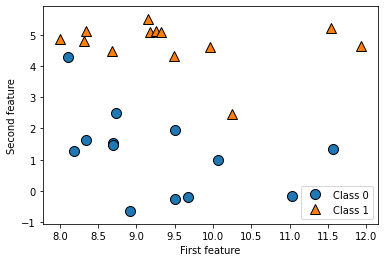

In [3]:
# 데이터셋 생성

X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:",X.shape)

**wave 데이터셋**
- 회귀 알고리즘 설명하려고 인위적으로 만든 데이터셋
- 입력 특성 하나와 모델링할 타겟 변수를 가짐
- 특성을 x축에 놓고 회귀의 타겟을 y축에 놓음

Text(0, 0.5, 'Target')

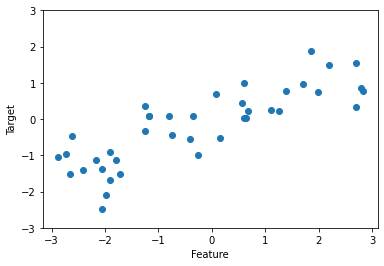

In [4]:
X,y = mglearn.datasets.make_wave(n_samples = 40)

plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(type(cancer))
print("\n")
print("cancer.keys():\n", cancer.keys())

<class 'sklearn.utils.Bunch'>


cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [7]:
print("Sameple counts per class:\n", {n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))})

# malignant : 악성
# benign : 양성

Sameple counts per class:
 {'malignant': 212, 'benign': 357}


In [8]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:",X.shape)

X.shape: (506, 104)


###K-Nearest Neighbors

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


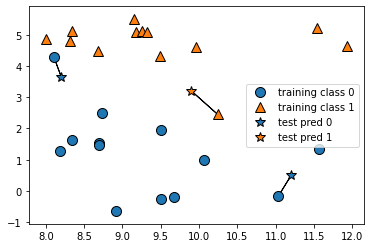

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


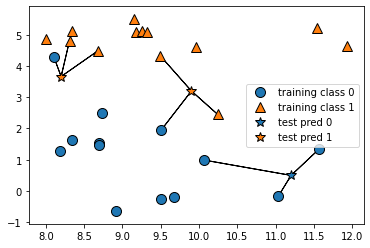

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [15]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
print("Test set prediction:", clf.predict(X_test))

Test set prediction: [1 0 1 0 1 0 0]


In [17]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test,y_test)))

Test set accuracy: 0.86


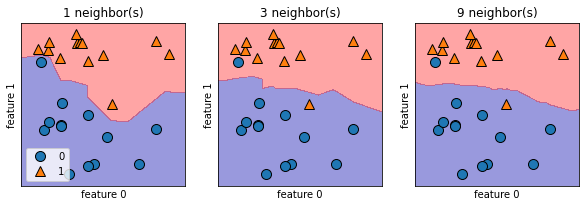

In [18]:
fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

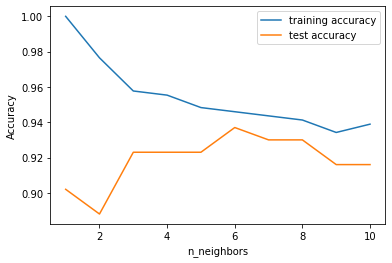

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
  clf = KNeighborsClassifier(n_neighbors = n_neighbors)
  clf.fit(X_train,y_train)
  training_accuracy.append(clf.score(X_train,y_train))
  test_accuracy.append(clf.score(X_test,y_test))


plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

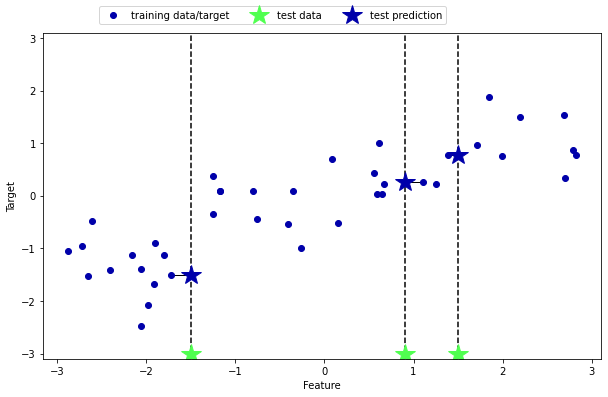

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

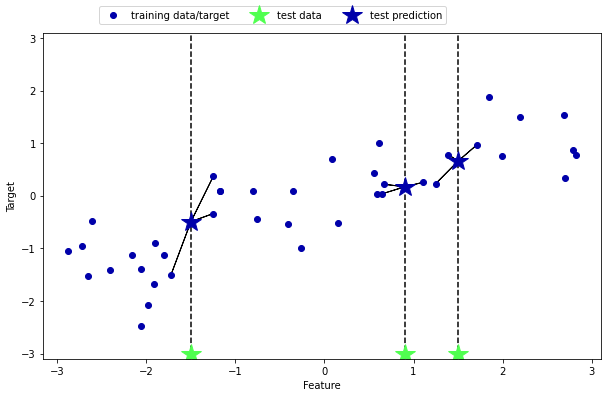

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

먼저 가장 가까운 이웃을 찾으면 

**분류(KNeighborsClassifier)는 그 이웃들중 어느 클래스가 많은지 *투표*하여 더 많이 있는 클래스로 분류하고,**

**회귀(KNeighborsRegressor)는 그 이웃들간의 거리를 *평균*으로 test data를 예측합니다.**

[출처] [Python/ML] K-NN Regression (KNeighborsRegressor) - 0209|작성자 데 박

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [23]:
print("Test set predictions:\n",reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [24]:
print("Test set R^@ : {:.2f}".format(reg.score(X_test,y_test)))

Test set R^@ : 0.83


np.linspace(-5, 5, 11)은 -5에서 5까지 11개의 선형 간격을 가진 구간을 보여줍니다.

In [25]:
# np.linspace 예시

example = np.linspace(-5,5,11)

print(example)

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


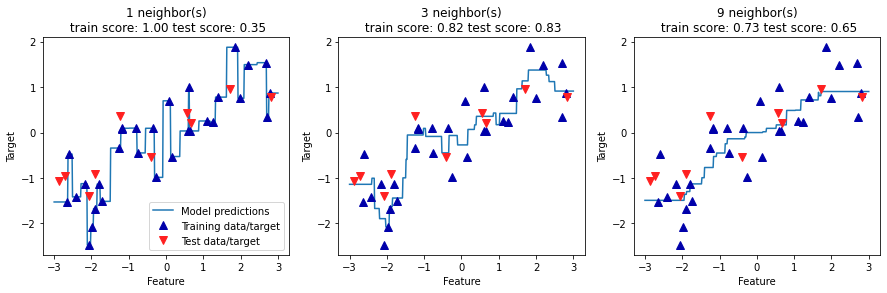

In [26]:
fig, axes = plt.subplots(1,3,figsize=(15,4))

line = np.linspace(-3,3,500).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9],axes):
  reg = KNeighborsRegressor(n_neighbors = n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize=8)
  ax.plot(X_test,y_test, 'v', c = mglearn.cm2(1), markersize=8)

  ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
  ax.set_xlabel("Feature")
  ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")



###Linear Models

Linear models for regression

w[0]: 0.393906  b: -0.031804


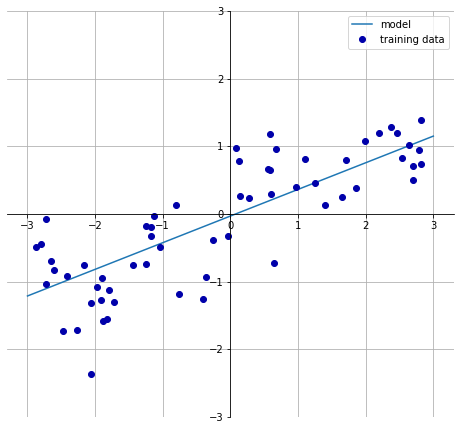

In [27]:
# 60개의 샘플을 활용하여 훈련셋과 테스트셋을 분리한다

mglearn.plots.plot_linear_regression_wave()

In [28]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

lr = LinearRegression().fit(X_train,y_train)

In [29]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:",lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [30]:
print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))

print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.67
Test set score: 0.66


In [31]:
X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
lr = LinearRegression().fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [32]:
print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.95
Test set score:0.61


**Ridge Regression**

- Ridge Regression은 변수들 간의 공산성이 있는 경우, 변수간 상관성으로 실제 사용할 수 있는 정보가 많지 않다고 가정하고, 변수들간의 Variance를 줄이기 위해 사용됨

- <U>과적합(Overfitting)을 개선하기 위해서</U> 사용하고, Feature Selection을 통해 모델의 복잡도를 개선하고자 하는 의도를 가짐

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test,y_test)))

Training set score: 0.89
Test set score: 0.75


In [34]:
ridge10 = Ridge(alpha = 10).fit(X_train,y_train)
print("Training set score:{:.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge10.score(X_test,y_test)))

Training set score:0.79
Test set score:0.64


In [35]:
ridge01 = Ridge(alpha = 0.1).fit(X_train,y_train)
print("Training set score:{:.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge01.score(X_test,y_test)))

Training set score:0.93
Test set score:0.77


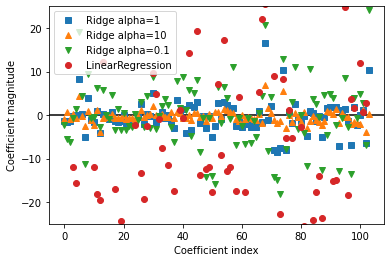

In [36]:
plt.plot(ridge.coef_,'s', label = "Ridge alpha=1")
plt.plot(ridge10.coef_,'^', label = "Ridge alpha=10")
plt.plot(ridge01.coef_,'v', label = "Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label = "LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

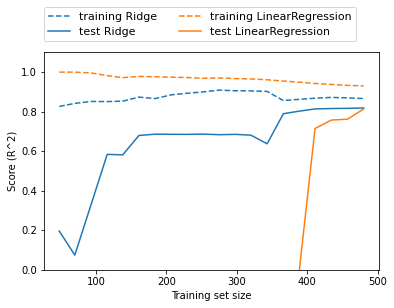

In [37]:
mglearn.plots.plot_ridge_n_samples()

**Lasso**

- Lasso Regression은 변수가 무수히 많은 경우, 실제 영향을 미치는 변수는 적다고 가정하여 영향이 적은 변수들은 계수를 0으로 만들어 영향력 있는 변수들의 특성을 극대화하기 위해 사용함
- Ridge와 달리 closed form solution을 구하는 것이 불가능
- 한계점 : 변수들 간 상관관계가 큰 경우에는 변수 선택의 성능이 저하되기 때문에 예측 성능도 저하가 되는 한계가 있음

---
Ridge와 Lasso는 변수들간의 상관관계와 주어진 문제의 제약조건에 따라 적절한 선택이 필요

In [38]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print("Training set score:{:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso.score(X_test,y_test)))
print("Number of features used:", np.sum(lasso.coef_ !=0))

Training set score:0.29
Test set score:0.21
Number of features used: 4


In [39]:
lasso001 = Lasso(alpha = 0.01, max_iter=100000).fit(X_train,y_train)
print("Training set score:{:.2f}".format(lasso001.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso001.score(X_test,y_test)))
print("Number of features used:", np.sum(lasso001.coef_ !=0))

Training set score:0.90
Test set score:0.77
Number of features used: 33


In [40]:
lasso00001 = Lasso(alpha = 0.0001, max_iter=100000).fit(X_train,y_train)
print("Training set score:{:.2f}".format(lasso00001.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso00001.score(X_test,y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ !=0))

Training set score:0.95
Test set score:0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

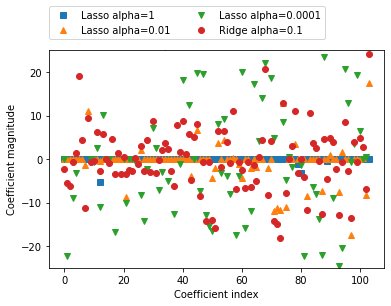

In [41]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Linear models for classification

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


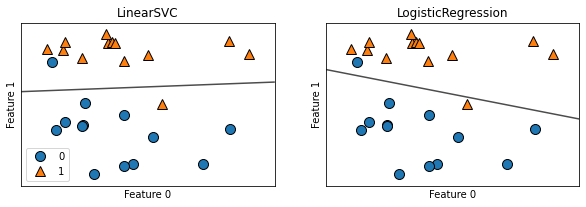

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig,axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax = ax, alpha = .7)
  mglearn.discrete_scatter(X[:,0], X[:,1],y,ax=ax)
  ax.set_title(clf.__class__.__name__)
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
axes[0].legend()

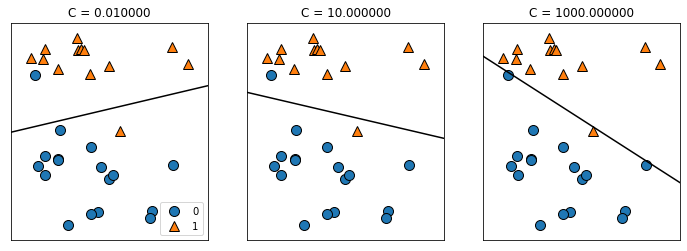

In [43]:
mglearn.plots.plot_linear_svc_regularization()

In [44]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg.score(X_test,y_test)))

Training set score:0.955
Test set score:0.951


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [45]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg100.score(X_test,y_test)))

Training set score:0.953
Test set score:0.965


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [46]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg001.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg001.score(X_test,y_test)))

Training set score:0.934
Test set score:0.930


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


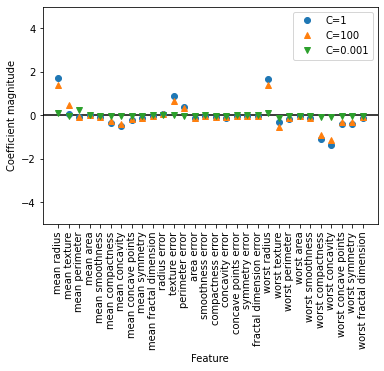

In [47]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


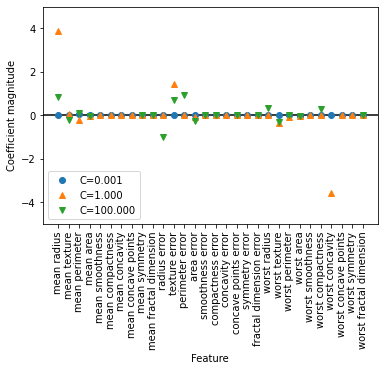

In [48]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

Linear models for multiclass classification

make_blobs 함수는 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성해준다. 

​

이때 등방성이란 모든 방향으로 같은 성질을 가진다는 뜻이다. 

​

make_blobs 함수의 인수와 반환값

​

인수 정수 또는 [n_centers, n_features] 크기의 배열. 디폴트 3

n_samples: 표본 데이터수 (기본값:100) 

n_features: 독립 변수의 수(기본값:20)

centers: 생성할 클러스터의 수, 또는 중심 

             정수 또는 [n_centers, n_features] 크기의 배열 (기본값: 3)

center_box : 생성할 클러스터의 바운딩 박스(기본값 (-10.0, 10.0)

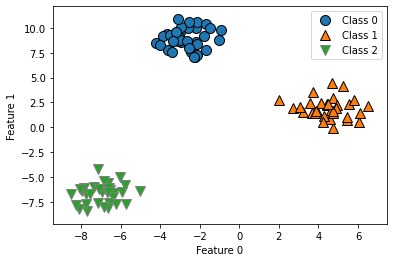

In [49]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [50]:
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


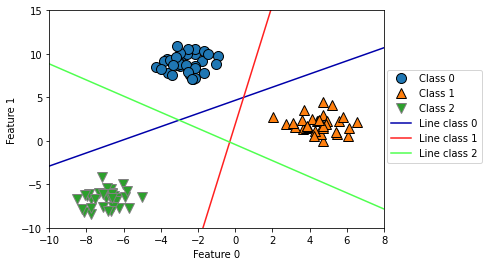

In [51]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

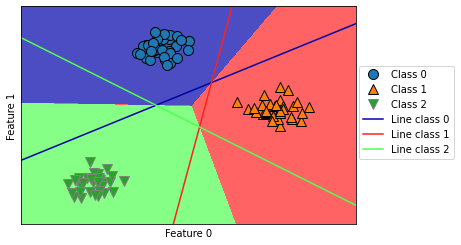

In [52]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Strengths, weaknesses and parameters

In [53]:
logreg = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [54]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train,y_train).predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [55]:
y_pred = LogisticRegression().fit(X_train,y_train).predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


###Naive Bayes Classifiers

In [56]:
X = np.array([[0,1,0,1],[1,0,1,1],
              [0,0,0,1],[1,0,1,0]])
y = np.array([0,1,0,1])

In [57]:
counts = {}

for label in np.unique(y):
  counts[label] = X[y==label].sum(axis=0)

print("Feature counts:\n",counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


####Decision trees

In [58]:
import sys
sys.path

['/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

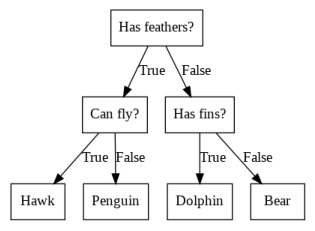

In [59]:
mglearn.plots.plot_animal_tree()

Building decision trees

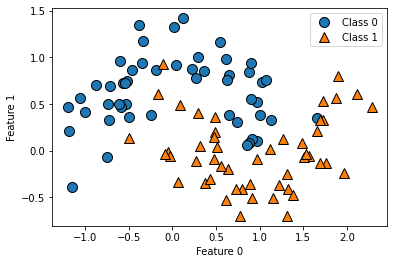

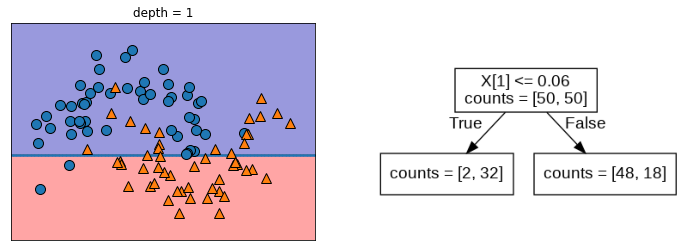

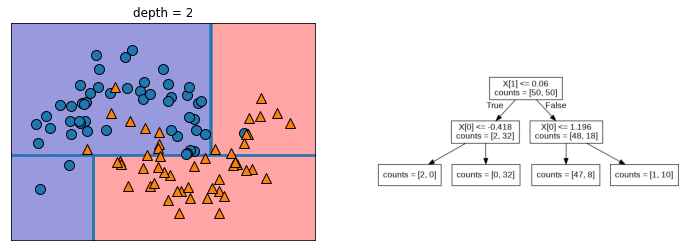

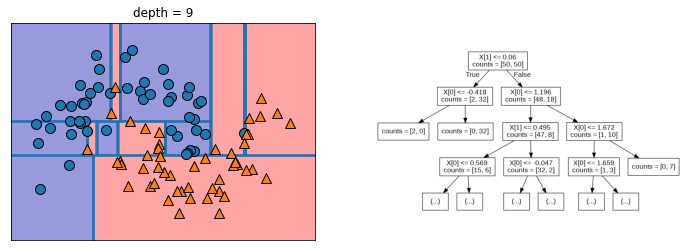

In [60]:
mglearn.plots.plot_tree_progressive()

Controlling complexity of decison trees

In [61]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [62]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


Analyzing Decision Trees

In [63]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot",class_names = ['malignant','benign'],
                feature_names = cancer.feature_names,impurity = False, filled=True)

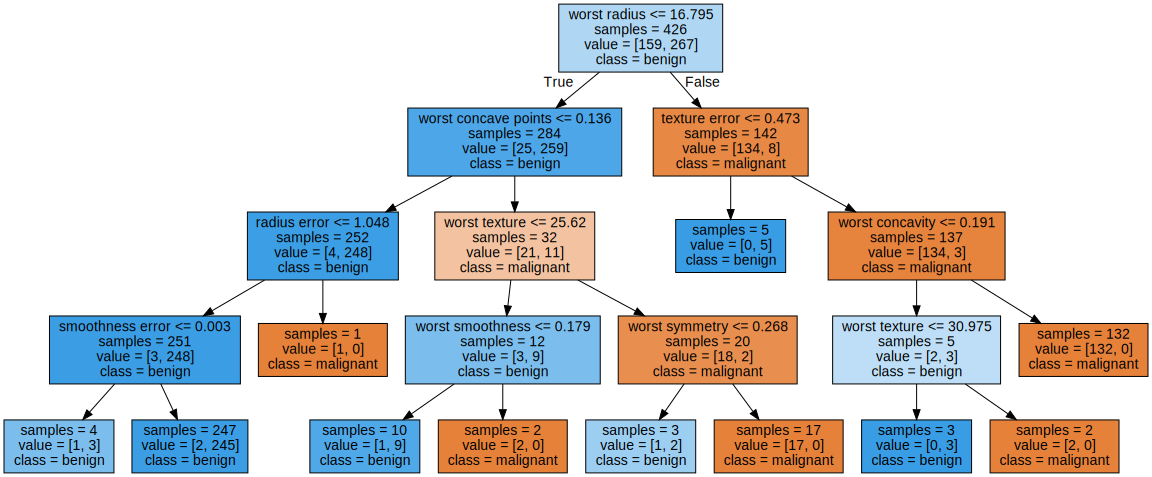

In [64]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

Feature Importance in trees

**Feature Importance**

각 특성별로 모든 트리에 대해 평균불순도감소(mean decrease impurity)를 계산한 값

- 트리 모델에서 불순도 감소를 계산 -> 특성을 중요한 것부터 나열

- 특성이 target을 얼마나 잘 설명하는가 -> 특정 feature가 트리를 분할하는데 얼마나 기여를 했는지 보여준다. -> 평균 불순도 감소

In [65]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


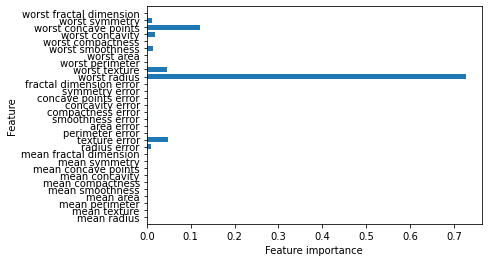

In [66]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(np.arange(n_features),model.feature_importances_, align = 'center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.ylim(-1,n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


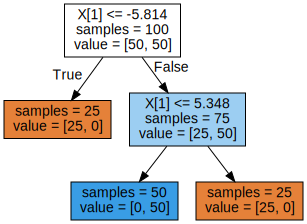

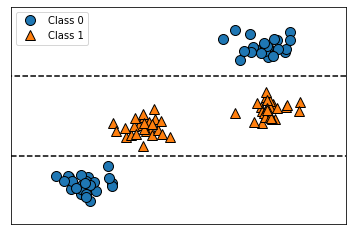

In [67]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

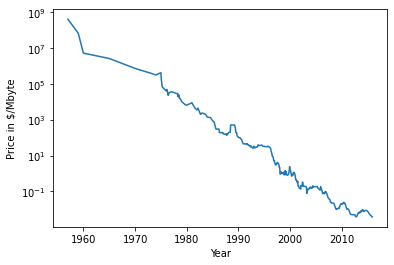

In [68]:
import pandas as pd

ram_prices = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2022/SeoulTech/Business Analytics/data/ram_price.csv")

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [69]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date<2000]
data_test = ram_prices[ram_prices.date>=2000]

X_train = data_train.date[:,np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth = 3).fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


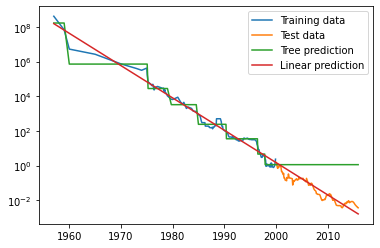

In [70]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

**Random Forest(랜덤 포레스트) 개념 정리**


- Random Forest(랜덤 포레스트)의 기원 : Decision Tree 는 Overfitting될 가능성이 높음
- Ensemble(앙상블) maching learning 모델이며, 여러개의 decision tree를 형성하고 새로운 데이터 포인트를 각 트리에 동시에 통과시키며, 각 트리가 분류한 겨로가에서 투표를 실시하여 가장 많이 득표한 결과를 최종 분류 결과로 선택함
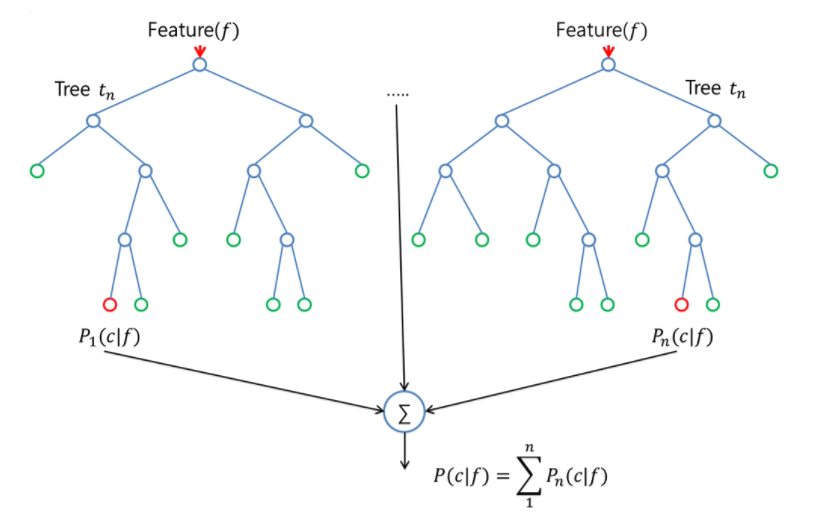


https://eunsukimme.github.io/ml/2019/11/26/Random-Forest/

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state = 42)
forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

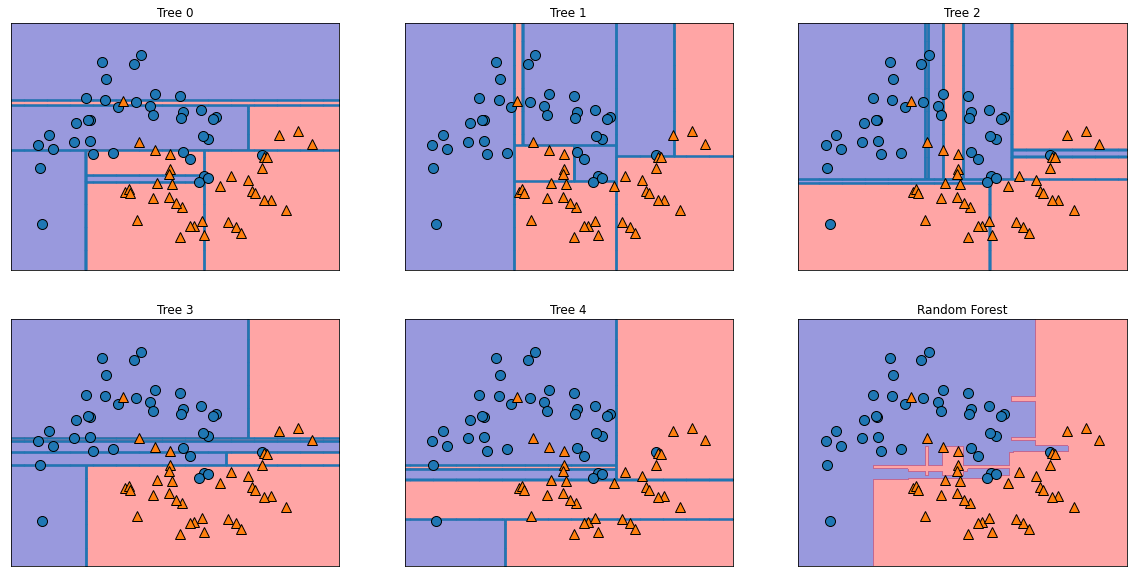

In [75]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill = True, ax = axes[-1,-1], alpha = .4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state = 0
)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


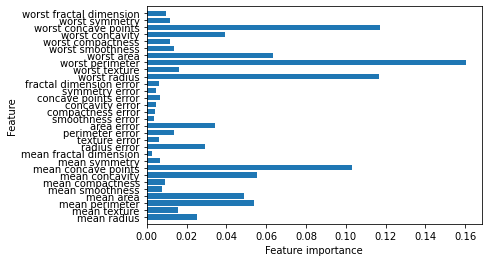

In [78]:
plot_feature_importances_cancer(forest)

Gradient Boosted Regression Trees (Gradient Boosting Machines)

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state = 0
)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [87]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth =1)
gbrt.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [88]:
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01)
gbrt.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


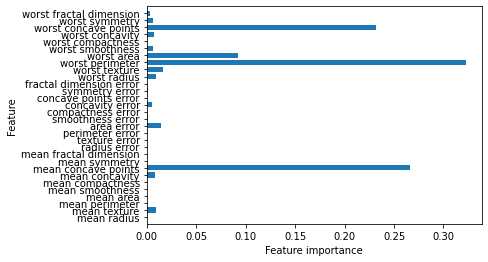

In [90]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

####Knernelized Support Vector Machines(SVM)

- 입력 데이터에서 단순한 초평면(hyperplane)으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것
- 직선과 초평면은 유연하지 못하여 저차원 데이터셋에서는 선형 모델이 매우 제한적임
- 선형 모델을 유연하게 만든느 한 가지 방법은 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 새로운 특성을 추가하는 것임

Text(0, 0.5, 'Feature 1')

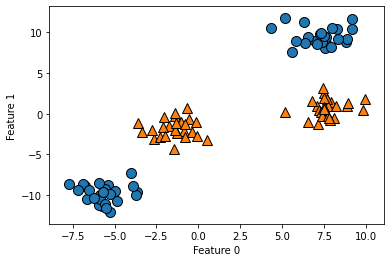

In [107]:
X, y = make_blobs(centers = 4, random_state = 8)
y = y%2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5, 0, 'feature1 ** 2')

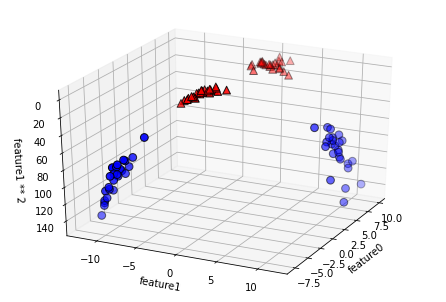

In [105]:
# hstack : 배열을 옆으로 결합하고 싶을 때 사용함

X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")